# Functional connectiviy Template 
### (Classifier)
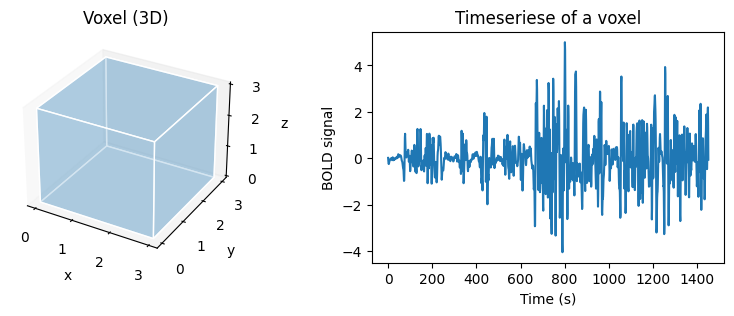

In [1]:
# Import necessary libraries
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt

from nilearn import datasets, maskers, plotting
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure


# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Functions

def fetch_func_files(wdir, file_suffix='_bold.nii.gz'):
    # Construct the search pattern using the file suffix
    pattern = f'**/*{file_suffix}'
    
    # Convert wdir to a Path object if it's not already one
    wdir = Path(wdir)
    
    # Use glob to find and sort the files matching the pattern
    func_files = sorted(glob(str(wdir / pattern), recursive=True))
    
    # Print the number of files found
    print(f"Number of functional files with suffix '{file_suffix}': {len(func_files)}")
    
    # Return the list of functional file paths
    return func_files
# data = fetch_func_files(wdir, file_suffix='_bold.nii.gz' )

def fetch_dss_files(wdir, task_name='rest'):
    # Construct the search pattern based on the task name
    pattern = f'**/sub-*/func/*task-{task_name}_bold.nii.gz'

    
    # Convert wdir to a Path object if it's not already one
    wdir = Path(wdir)
    
    # Use glob to find and sort the files matching the pattern
    func_files = sorted(glob(str(wdir / pattern), recursive=True))
    
    # Print the number of files found
    print(f"Number of '{task_name}' functional files: {len(func_files)}")
    
    # Return the list of functional file paths
    return func_files
# data_func = fetch_dss_files(wdir, task_name='rest')

def load_json_file(file_name, data_dir):

    data_dir = Path(data_dir)
    file_path = data_dir / file_name
    
    # Check if the file exists
    if not file_path.exists():
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    # Read the JSON file
    with file_path.open('r', encoding='utf-8') as file:
        data = json.load(file)
    
    # Print the contents of the JSON file
    print(json.dumps(data, indent=4))
    
    return data
# df_description = load_json_file("dataset_description.json", data_dir=wdir)


In [39]:
# Shortcuts

#dataset = datasets.fetch_adhd(n_subjects=None, data_dir=None, url=None, resume=True, verbose=1)

#dataset = datasets.fetch_openneuro_dataset(urls=None, data_dir=None, dataset_version='ds000030_R1.0.5', verbose=1)[source]

#dataset = datasets.fetch_abide_pcp(n_subjects=None, data_dir=None, url=None)

#dataset = datasets.fetch_development_fmri()

#pheno = pd.DataFrame(dataset.phenotypic)

#print('Keys:',list(data.keys()))
#print('Number of subjects:', len(data.func))
#print('Description:',data.description)


#---------------------------------------------


#wdir = r'C:\Users\lacom\nilearn_data\development_fmri\development_fmri'

#data_func = sorted(glob(os.path.join(wdir,'*.gz')))
#confounds = sorted(glob(os.path.join(wdir,'*desc-confounds_regressors.tsv')))

#print ('Func Data:',len(data))
#print ('Confounds:',len(confounds))

#pheno_path = os.path.join(wdir, 'participants.tsv')
#pheno = pd.read_csv(pheno_path, sep='\t').sort_values('participant_id')
#pheno.head()

## Load the data

In [35]:

dataset = datasets.fetch_development_fmri()

print('Keys:',list(dataset.keys()))
print('Number of subjects:', len(dataset.func))

Keys: ['func', 'confounds', 'phenotypic', 'description']
Number of subjects: 155


In [12]:
data = dataset.func

In [ ]:
print('Description:',dataset.description)

In [13]:
fmri_filenames = data[5]
print(fmri_filenames)

C:\Users\lacom/nilearn_data\development_fmri\development_fmri\sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


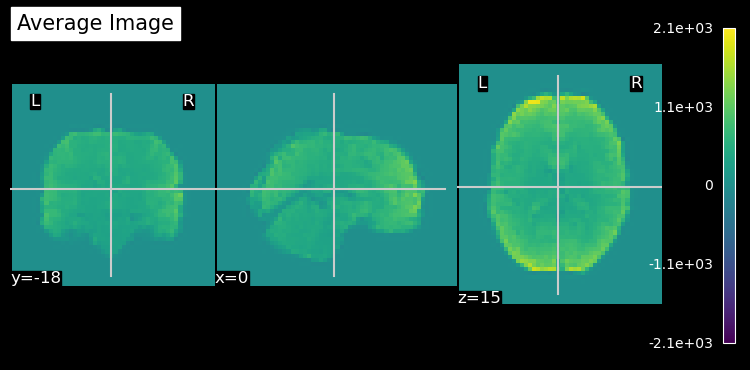

In [29]:
from nilearn import image 
averaged_Img = image.mean_img(image.mean_img(fmri_filenames))
plotting.plot_stat_map(averaged_Img,title='Average Image', cmap='viridis',threshold=0.1, dim=-2, colorbar=True,black_bg=True)

In [31]:
confounds = dataset.confounds
conf = confounds[5]
conf_df = pd.read_table(conf)
conf_df.head()

trans_x   trans_y   trans_z     rot_x     rot_y  rot_z  \
0  0.000000  0.000000  0.000000  0.000000 -0.000000    0.0   
1  0.002290  0.039488 -0.000004  0.000000  0.000190    0.0   
2 -0.000011 -0.104030 -0.009560  0.000164  0.000366    0.0   
3 -0.000031  0.169104  0.013041 -0.000843  0.000453    0.0   
4 -0.000061 -0.145348 -0.025025  0.000060  0.000386    0.0   

   framewise_displacement  a_comp_cor_00  a_comp_cor_01  a_comp_cor_02  \
0                0.000000       0.000000       0.000000       0.000000   
1                0.051301      -0.009419       0.064324      -0.046474   
2                0.172322      -0.013124       0.010970       0.072557   
3                0.350465       0.033150       0.025784       0.036211   
4                0.401084      -0.035600      -0.035397      -0.127860   

   a_comp_cor_03  a_comp_cor_04  a_comp_cor_05         csf  white_matter  
0       0.000000       0.000000       0.000000  525.521464    473.476960  
1       0.006744      -0.007179       0.025285  529.577966    476.734232  
2       0.030795       0.015773      -0.063280  531.250261    476.517911  
3       0.005530       0.048968      -0.025824  531.240585    476.460569  
4       0.001092      -0.031902       0.048258  531.931781    476.174483

### Explore the Target Variable (Y)

In [41]:
pheno = pd.DataFrame(dataset.phenotypic)
pheno.head()

participant_id    Age AgeGroup Child_Adult Gender Handedness
0   sub-pixar123  27.06    Adult       adult      F          R
1   sub-pixar124  33.44    Adult       adult      M          R
2   sub-pixar125  31.00    Adult       adult      M          R
3   sub-pixar126  19.00    Adult       adult      F          R
4   sub-pixar127  23.00    Adult       adult      F          R

In [42]:
# INFO

# Display the shape of the data
print("Data Shape:")
print(pheno.shape)

# Check for any duplicate entries in the data.
print('')
print("Duplicate Values:")
print('(',pheno.duplicated().sum(),')')


# Display the data types of the columns
print("\nData Types:")
print(pheno.dtypes.value_counts())

# Check for missing values
missing_columns = pheno.columns[pheno.isnull().any()]
if missing_columns.size > 0:
    missing_values = pheno[missing_columns].isnull().sum()
    missing_percentage = (missing_values / len(pheno)) * 100

    # Combine missing_values and missing_percentage into a single DataFrame
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

    # Sort the missing_data DataFrame by Total column in descending order
    missing_data = missing_data.sort_values(by='Total', ascending=False)

    # Print missing data
    print("\nMissing Data:")
    print(missing_data.to_string())
else:
    print("\nNo Missing Values Found")



Data Shape:
(155, 6)

Duplicate Values:
( 0 )

Data Types:
object     5
float64    1
Name: count, dtype: int64

No Missing Values Found


In [43]:
pheno.columns

Index(['participant_id', 'Age', 'AgeGroup', 'Child_Adult', 'Gender',
       'Handedness'],
      dtype='object')

In [46]:
pheno[['participant_id', 'Age', 'Child_Adult', 'Gender']].sample(10)

participant_id        Age Child_Adult Gender
130   sub-pixar098  10.190000       child      M
151   sub-pixar119   8.620000       child      F
125   sub-pixar093   8.590000       child      F
135   sub-pixar103  10.550000       child      M
124   sub-pixar092   8.480000       child      M
121   sub-pixar089   8.020000       child      M
44    sub-pixar012   3.786448       child      F
49    sub-pixar017   3.613963       child      F
33    sub-pixar001   4.774812       child      M
5     sub-pixar128  27.000000       adult      M

Number of classes: ['F' 'M']
Gender
F    84
M    71
Name: count, dtype: int64


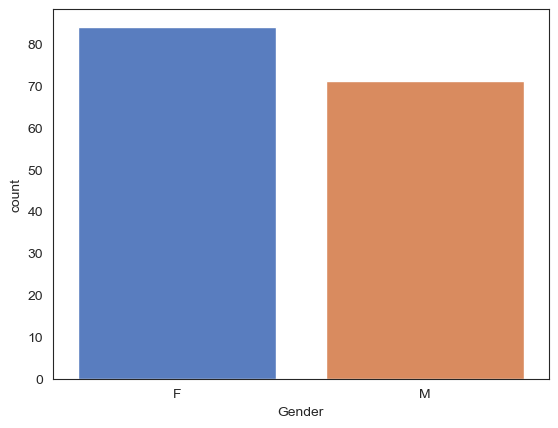

In [48]:
sex = pheno['Gender']

print('Number of classes:',sex.unique())

sns.set_style("white")
sns.set_palette("muted")
sns.countplot(x= sex)

print(sex.value_counts())

**AGE DISTRIBUTION**

Asymmetry: 1.544492
Kurtosis: 1.425876


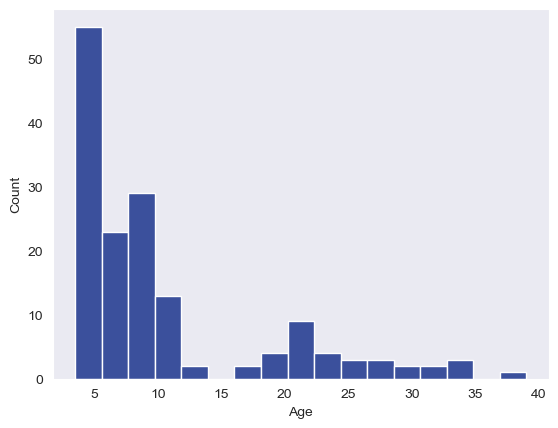

In [55]:
age = pheno['Age']

sns.set_style("dark")
sns.set_palette("dark")
sns.histplot(age)

#skewness and kurtosis
print("Asymmetry: %f" % age.skew())
print("Kurtosis: %f" % age.kurt())

In [56]:
# Group by column
diagnosis = pheno.groupby('Child_Adult')

# Calculate descriptive statistics
diagnosis['Age'].describe()

count       mean       std        min       25%    50%      75%  \
Child_Adult                                                                    
adult         33.0  24.772727  5.308521  18.000000  21.00000  23.00  28.0000   
child        122.0   6.709461  2.330938   3.518138   4.89521   5.98   8.3975   

              max  
Child_Adult        
adult        39.0  
child        12.3

### Probabilistic Atlas
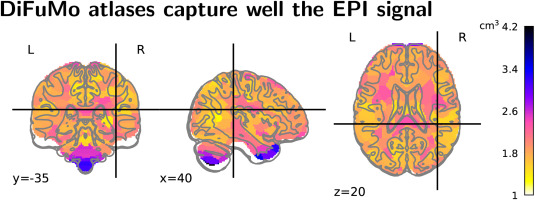

In [59]:
dim = 64
difumo = datasets.fetch_atlas_difumo(
    dimension=dim, resolution_mm=2, legacy_format=False
)

atlas_filename = difumo.maps




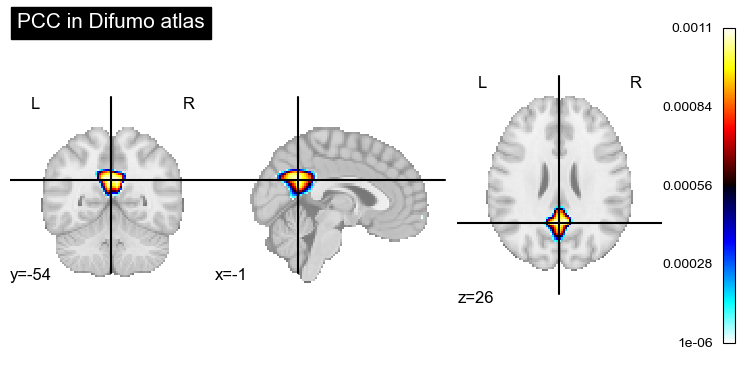

In [44]:
from nilearn import image, plotting

# First plot the map for the PCC: index 3 in the atlas
display = plotting.plot_stat_map(
    image.index_img(atlas_filename, 3),
    colorbar=True,
    title="PCC in Difumo atlas",
)

plotting.show()

In [64]:
difumo.labels

component                       difumo_names     yeo_networks7  \
0           1            Superior frontal sulcus          DefaultB   
1           2                     Fusiform gyrus  No network found   
2           3         Calcarine cortex posterior           VisCent   
3           4         Cingulate cortex posterior          DefaultB   
4           5  Parieto-occipital sulcus superior             ContA   
..        ...                                ...               ...   
59         60                             Cuneus           VisCent   
60         61              Middle temporal gyrus          DefaultB   
61         62             Superior frontal gyrus          DefaultB   
62         63                     Central sulcus           SomMotA   
63         64                            Caudate  No network found   

      yeo_networks17        gm        wm       csf  
0           DefaultA  0.689996  0.185709  0.116884  
1   No network found  0.844733  0.021026  0.133789  
2            VisPeri  0.601768  0.302067  0.091297  
3           DefaultA  0.740086  0.140368  0.119567  
4              ContC  0.640157  0.241492  0.117826  
..               ...       ...       ...       ...  
59           VisPeri  0.627179  0.269783  0.103005  
60          DefaultB  0.726527  0.149595  0.107329  
61          DefaultB  0.651182  0.062243  0.224067  
62           SomMotB  0.578502  0.291674  0.109244  
63  No network found  0.703295  0.260386  0.036332  

[64 rows x 7 columns]

### Extract features with nilearn masker

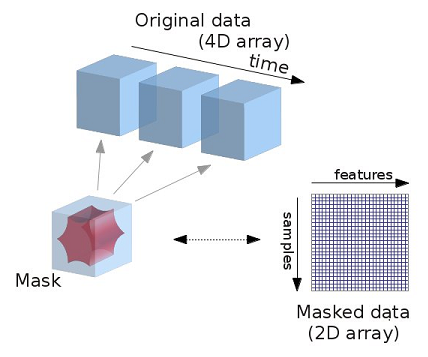 

Compute a correlation matrix, representing regional coactivation between regions and extract signals from a brain parcellation 


In [65]:
from nilearn.maskers import MultiNiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

# create masker using MultiNiftiMapsMasker to extract functional data within
# atlas parcels from multiple subjects using parallelization to speed up the
# # computation
masker = MultiNiftiMapsMasker(
    maps_img=atlas_filename,
    standardize='zscore_sample',
    standardize_confounds='zscore_sample',
    memory='nilearn_cache',
    n_jobs=2, verbose=0
)

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(
    kind='correlation', vectorize=True, discard_diagonal=True)




In [ ]:
# METHOD 2

# extract time series from all subjects
#time_series = masker.fit_transform(data, confounds=data_confounds)

# calculate correlation matrices across subjects and display
#correlation_matrices = connectome_measure.fit_transform(time_series)

In [66]:
data[:4]

['C:\\Users\\lacom/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 'C:\\Users\\lacom/nilearn_data\\development_fmri\\development_fmri\\sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 'C:\\Users\\lacom/nilearn_data\\development_fmri\\development_fmri\\sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 'C:\\Users\\lacom/nilearn_data\\development_fmri\\development_fmri\\sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

**Extract fMRI connectivity features from every subject.**



In [68]:
all_features = [
    connectome_measure.fit_transform([masker.fit_transform(sub, confounds=confounds[i])])[0]
    for i, sub in enumerate(data)
]

In [69]:
# Let's save the data to disk

np.savez_compressed('Age_Classf_featuress.npz',a = all_features)

In [70]:
# Load the features

feat_file = 'Age_Classf_featuress.npz'
X_features = np.load(feat_file)['a']

print('Features shape:', X_features.shape)

Features shape: (155, 2016)


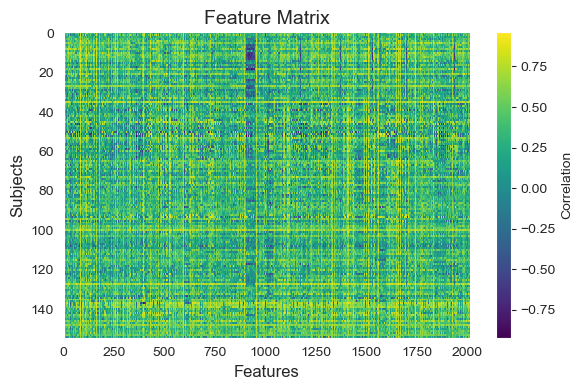

In [72]:
# Create the plot
plt.figure(figsize=(6, 4))
plt.imshow(X_features, aspect='auto', cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar(label='Correlation')

# Add title and labels
plt.title('Feature Matrix', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Subjects', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Prepare data for machine learning

In [73]:
y_target = pheno['Gender']


print('y type:',type(y_target))
print('X type:',type(X_features))

y type: <class 'pandas.core.series.Series'>
X type: <class 'numpy.ndarray'>


In [74]:
from sklearn.model_selection import train_test_split

# Split the sample into training/test
X_train, X_test, y_train, y_test = train_test_split(
    X_features,  # Features
    y_target,  # Target variable
    test_size=0.3,  # 70%/30% split
    shuffle=True,  # Shuffle dataset before splitting
    random_state=123  # Set random state for reproducibility
)

# Print the size of the training and test sets
print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Training set size: 108
Testing set size: 47


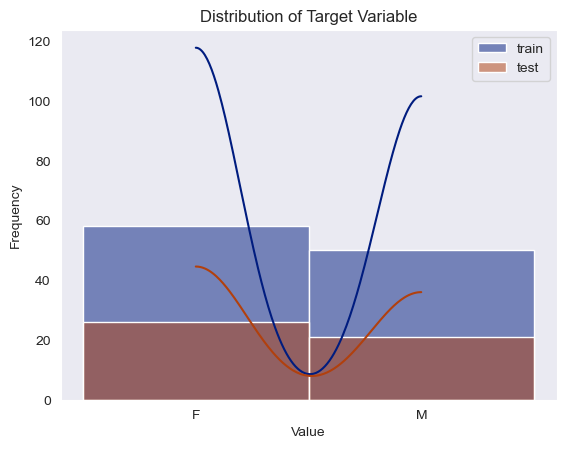

training: 108 testing: 47


In [75]:
# Check data distribution
sns.histplot(y_train, label='train', kde=True)
sns.histplot(y_test, label='test', kde=True)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

# Print the size of the training and test sets
print('training:', len(X_train), 'testing:', len(X_test))


## **Classification Linear Model**

We'll start with a standard classification model called a Support Vector Classifier (SVC)

Despite its simplicity, this model shines in its ability to deliver robust results. Given our data constraints, a straightforward approach often proves to be the most effective.

In [138]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the Support Vector Classifier
svc_model = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Expand range of penalty parameter C
    'kernel': ['linear'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Expand range of gamma values
}

# Define cross-validation technique (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [139]:

# Train the model with the best parameters
best_svc_model = SVC(**best_params)
best_svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svc_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5531914893617021
Classification Report:
               precision    recall  f1-score   support

           F       0.58      0.69      0.63        26
           M       0.50      0.38      0.43        21

    accuracy                           0.55        47
   macro avg       0.54      0.54      0.53        47
weighted avg       0.54      0.55      0.54        47



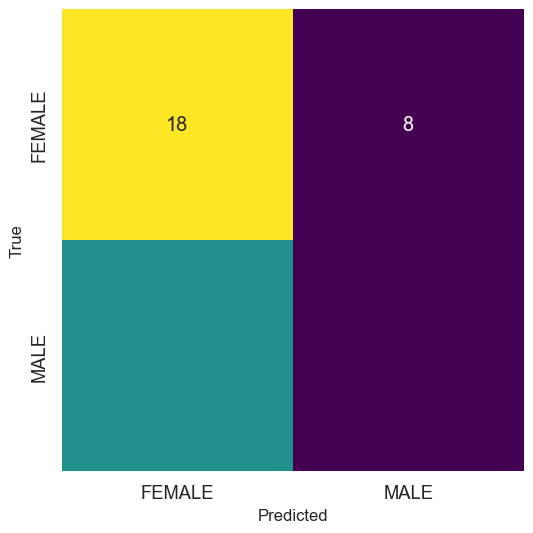

In [140]:
# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a prettier confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar=False,
    square=True,
    xticklabels=['FEMALE', 'MALE'],
    yticklabels=['FEMALE', 'MALE'],
)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("", fontsize=15)
plt.show()

## Interpreting linear model weights

In [141]:
correlation_measure = connectome_measure

connectome_measure.inverse_transform(best_svc_model.coef_).shape

(1, 64, 64)

Text(0, 0.5, 'weight')

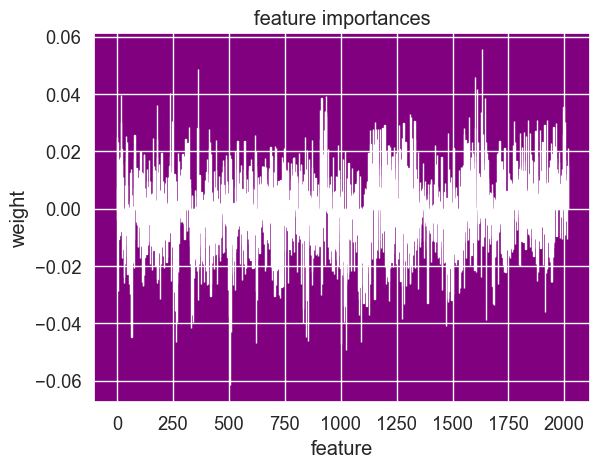

In [143]:
# Get the coefficients (weights) of the linear SVM model from best_estimator
coefficients = best_svc_model.coef_



plt.bar(range(coefficients.shape[-1]),coefficients[0])
plt.gca().set_facecolor('purple')  # Change background color
plt.title('feature importances')
plt.xlabel('feature')
plt.ylabel('weight')

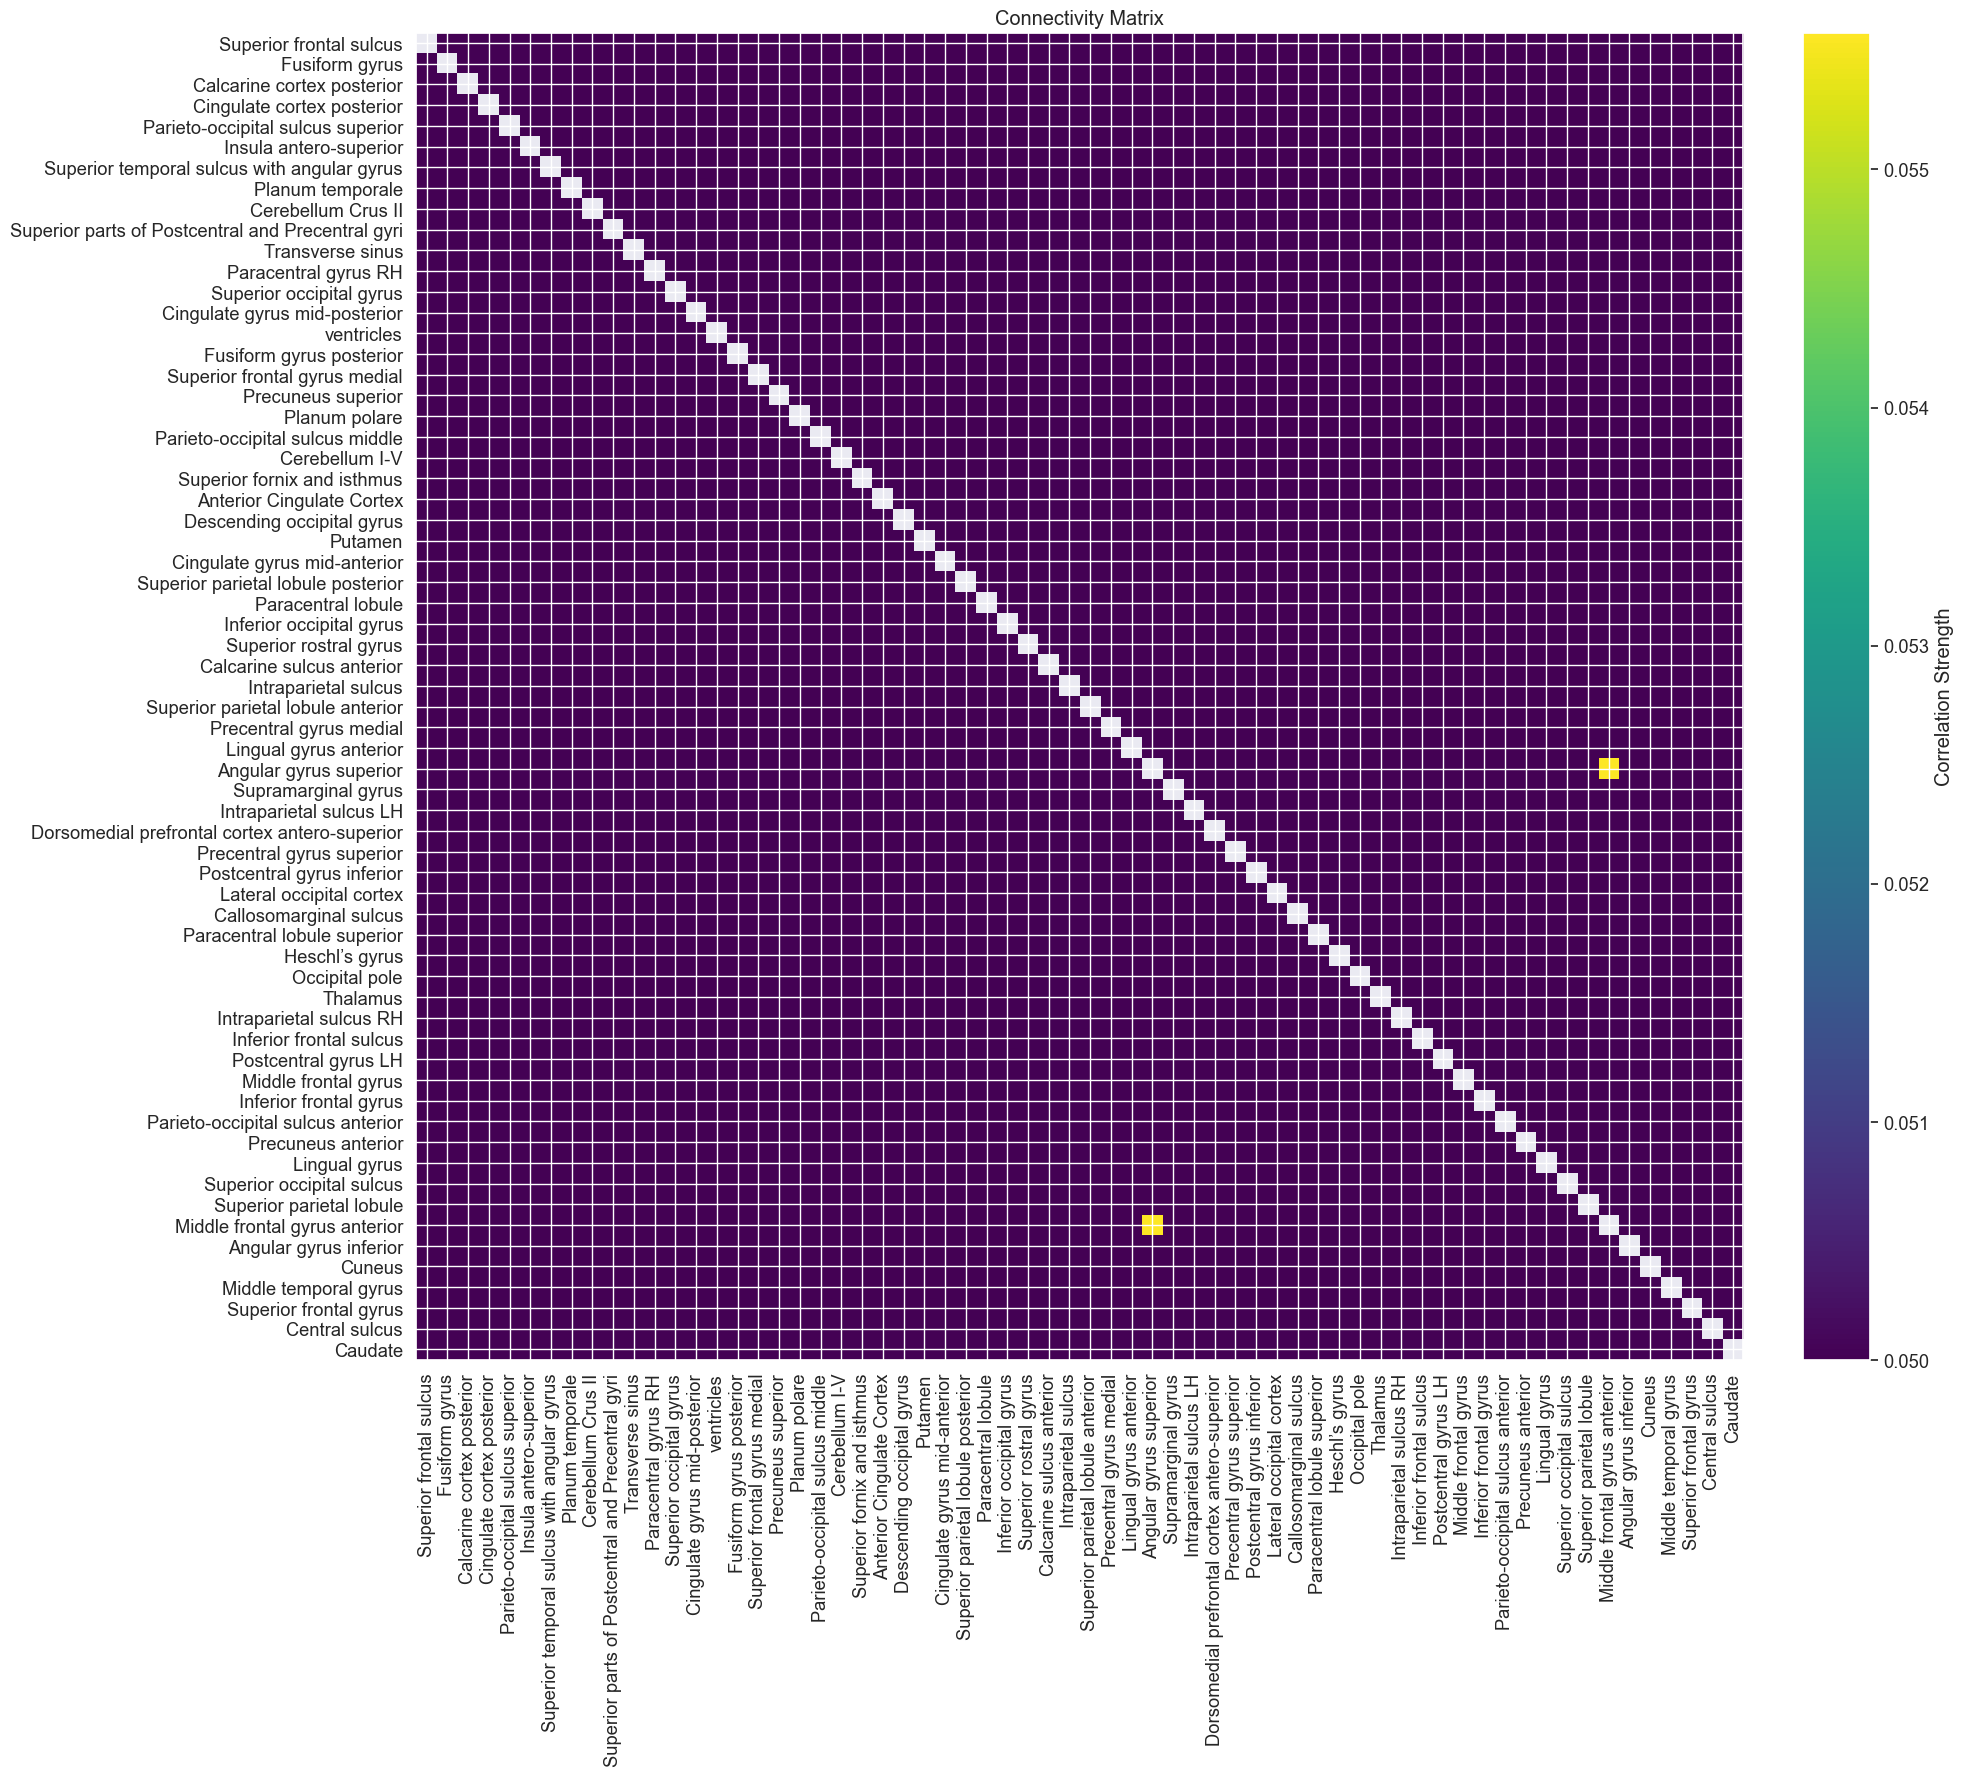

In [100]:
feat_exp_matrix = correlation_measure.inverse_transform(best_svc_model.coef_)[0]

# Define a threshold to visualize only higher values
threshold = 0.05  # Adjust this threshold as needed

labels = difumo.labels["difumo_names"]

# Replace diagonal with NaN to remove it from the plot
np.fill_diagonal(feat_exp_matrix, np.nan)

# Plot the matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
plt.imshow(feat_exp_matrix, cmap='viridis', origin='upper', vmin=threshold)
plt.colorbar(label='Correlation Strength', fraction=0.046, pad=0.04)  # Adjust color bar position

# Add labels to the ticks
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=range(len(labels)), labels=labels)

# Add title
plt.title('Connectivity Matrix')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [102]:
# Define a threshold to visualize only higher values
threshold = 0.05  # Adjust this threshold as needed

# Iterate over the correlation matrix and print the values
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and feat_exp_matrix[i, j] >= threshold:
            print(f"{labels[i]} - {labels[j]}: {feat_exp_matrix[i, j]}")


Angular gyrus superior - Middle frontal gyrus anterior: 0.05557526468044454
Middle frontal gyrus anterior - Angular gyrus superior: 0.05557526468044454


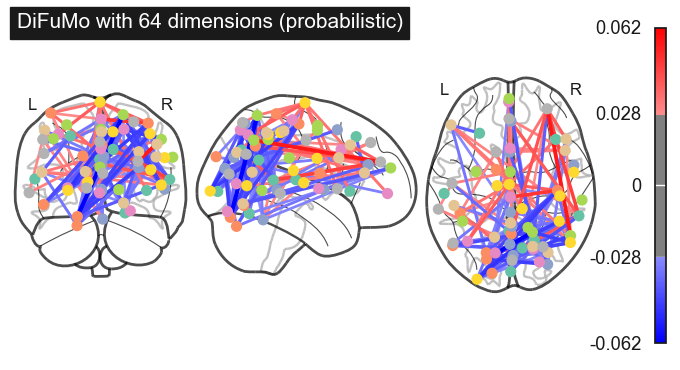

In [105]:
# grab center coordinates for probabilistic atlas
coords = plotting.find_probabilistic_atlas_cut_coords(
    maps_img=difumo.maps
)


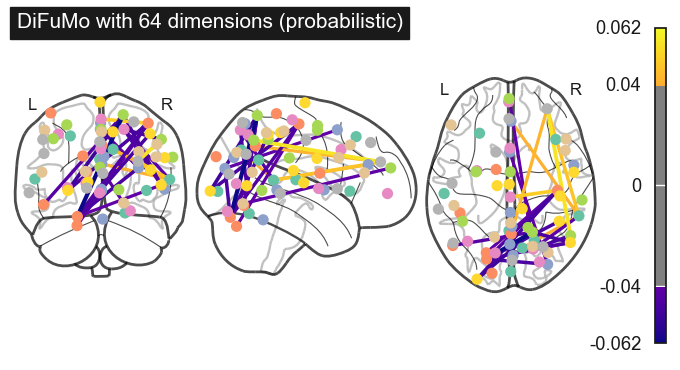

In [169]:
# plot connectome with 85% edge strength in the connectivity
plotting.plot_connectome(
    feat_exp_matrix,
    coords,
    colorbar=True,
    edge_cmap='plasma',
    edge_threshold="99%",
    title=f"DiFuMo with {dim} dimensions (probabilistic)",
)
plotting.show()

In [168]:
plotting.view_connectome(feat_exp_matrix, coords, edge_threshold='99.5%',
                        edge_cmap='plasma')

### Positive Correlations

In [110]:
p_threshold = 0.055  # Adjust this threshold as needed

# Iterate over the correlation matrix and print the values
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and feat_exp_matrix[i, j] >= p_threshold:
            print(f"{labels[i]} - {labels[j]}: {feat_exp_matrix[i, j]}")


Angular gyrus superior - Middle frontal gyrus anterior: 0.05557526468044454
Middle frontal gyrus anterior - Angular gyrus superior: 0.05557526468044454


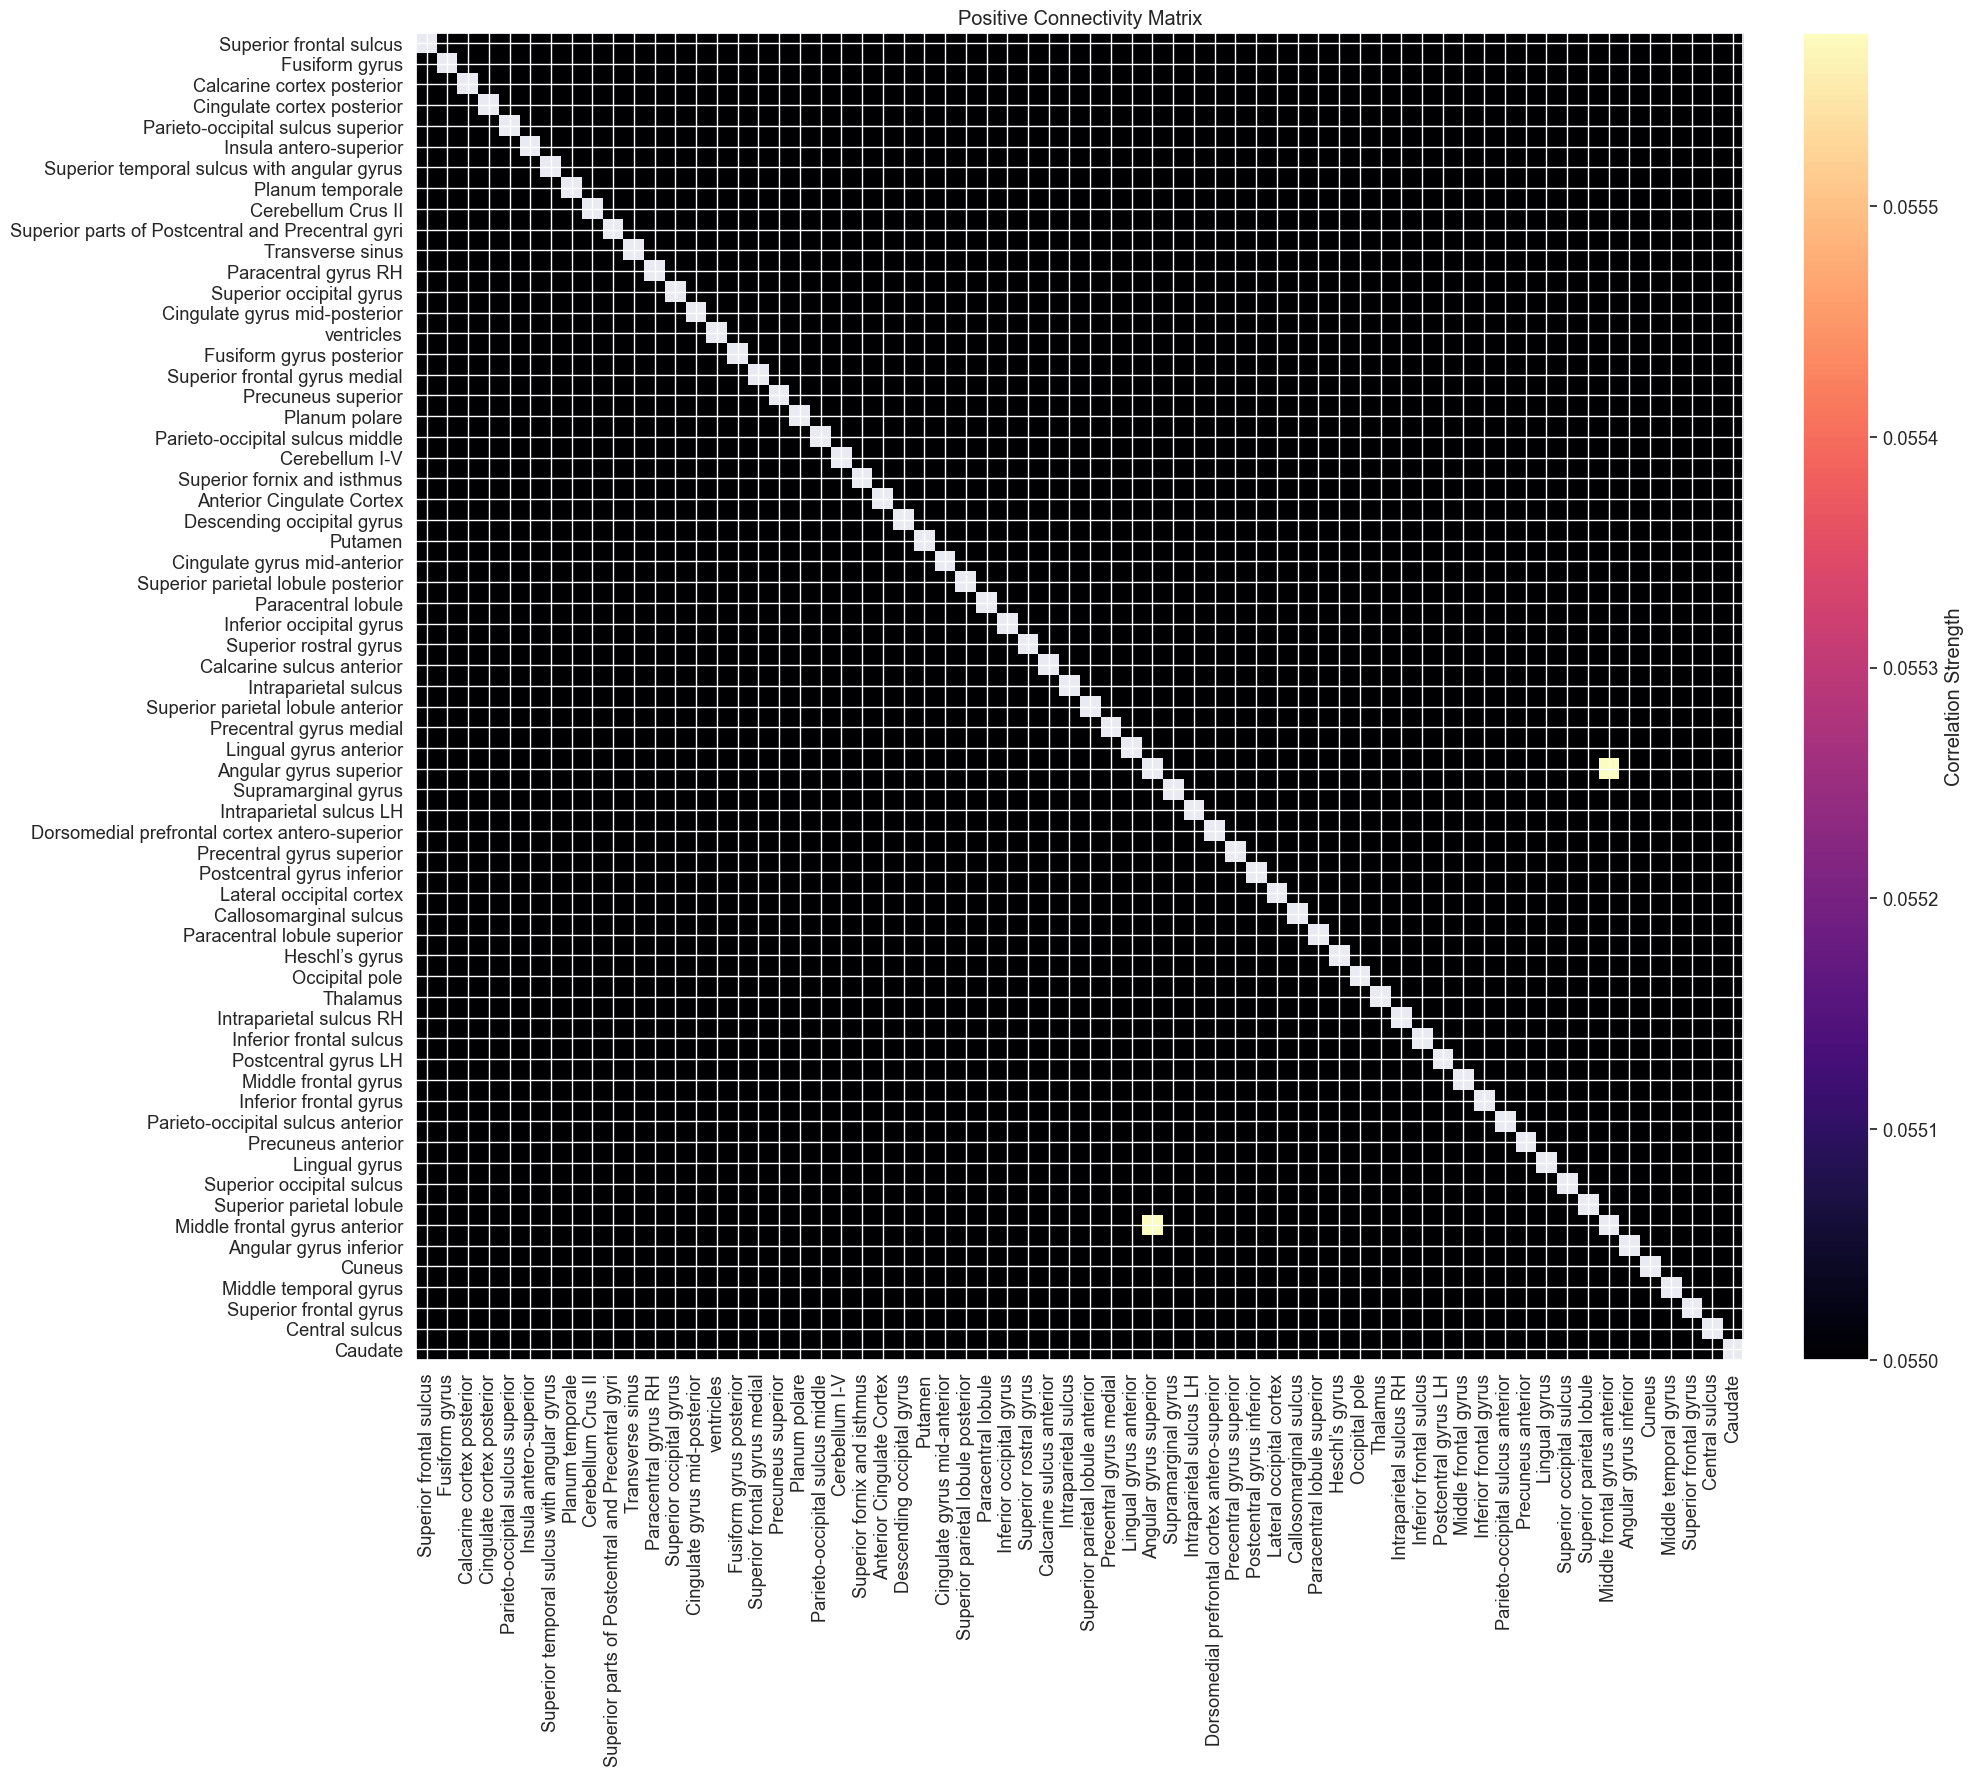

In [172]:
# Plot the positive corr matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
plt.imshow(feat_exp_matrix, cmap='magma', origin='upper', vmin=p_threshold)
plt.colorbar(label='Correlation Strength', fraction=0.046, pad=0.04)  # Adjust color bar position

# Add labels to the ticks
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=range(len(labels)), labels=labels)

# Add title
plt.title('Positive Connectivity Matrix')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Negative Correlations

In [163]:
n_threshold = -0.045  

# Iterate over the correlation matrix and print the values
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and feat_exp_matrix[i, j] < n_threshold:
            print(f"{labels[i]} - {labels[j]}: {feat_exp_matrix[i, j]}")


Transverse sinus - Descending occipital gyrus: -0.0466559706902612
Transverse sinus - Superior parietal lobule anterior: -0.06166720574801167
Transverse sinus - Intraparietal sulcus RH: -0.04654575509704577
Paracentral gyrus RH - Occipital pole: -0.0471903712514799
Descending occipital gyrus - Transverse sinus: -0.0466559706902612
Superior parietal lobule posterior - Angular gyrus superior: -0.046715304130548745
Superior parietal lobule anterior - Transverse sinus: -0.06166720574801167
Superior parietal lobule anterior - Lateral occipital cortex: -0.04616432901742263
Superior parietal lobule anterior - Occipital pole: -0.04929082558327552
Angular gyrus superior - Superior parietal lobule posterior: -0.046715304130548745
Lateral occipital cortex - Superior parietal lobule anterior: -0.04616432901742263
Occipital pole - Paracentral gyrus RH: -0.0471903712514799
Occipital pole - Superior parietal lobule anterior: -0.04929082558327552
Intraparietal sulcus RH - Transverse sinus: -0.04654575

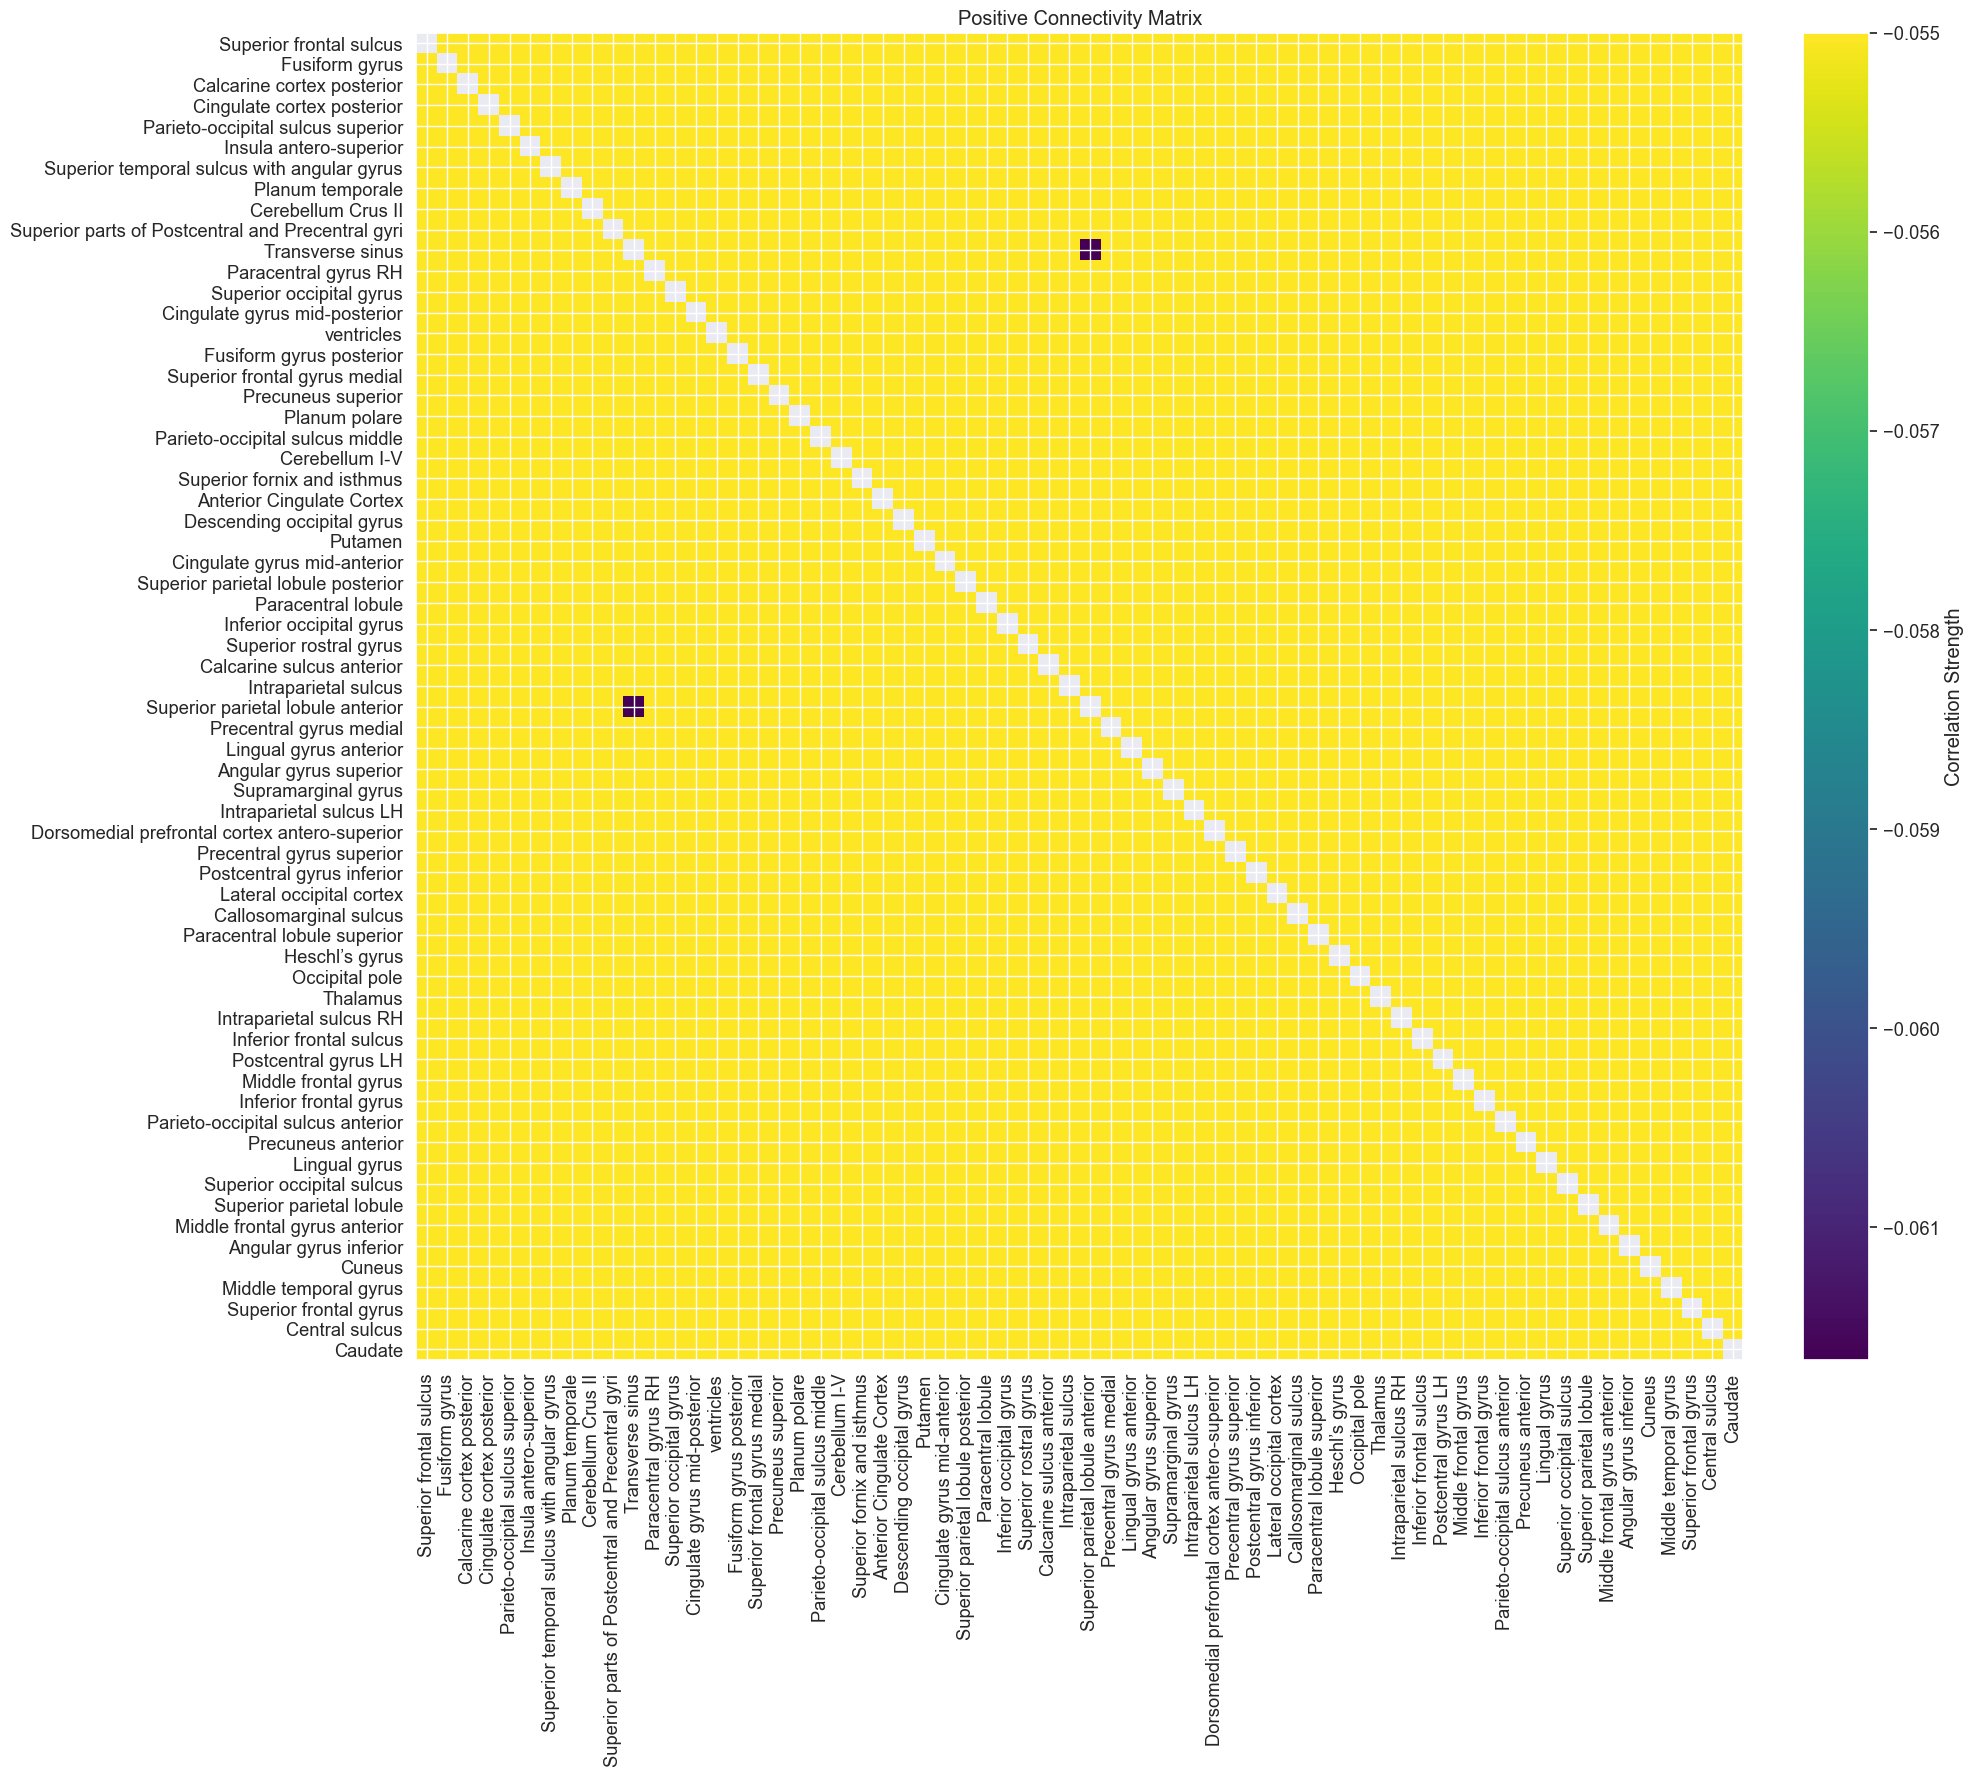

In [115]:
# Plot the negative corr matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
plt.imshow(feat_exp_matrix, cmap='viridis', origin='upper', vmax=n_threshold)
plt.colorbar(label='Correlation Strength', fraction=0.046, pad=0.04)  # Adjust color bar position

# Add labels to the ticks
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=range(len(labels)), labels=labels)

# Add title
plt.title('Positive Connectivity Matrix')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## **Non-Linear Model**

In [116]:
# Print the size of the training and test sets
print('training:', len(X_train), 'testing:', len(X_test))

training: 108 testing: 47


**Extract fMRI connectivity features from every subject.**

In [164]:
# Load the features

print('Features shape:', X_features.shape)

Features shape: (155, 2016)


**Run the Classification Model**

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the Support Vector Classifier
svc_model = SVC()


# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Expand range of penalty parameter C
    'kernel': ['rbf','poly'],  # Kernel types: linear, radial basis function (rbf), polynomial (poly)
    'gamma': ['scale'],  # Expand range of gamma values
}

# Define cross-validation technique (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print results
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [118]:
# Train the model with the best parameters
best_svc_model = SVC(**best_params)
best_svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svc_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5106382978723404
Classification Report:
               precision    recall  f1-score   support

           F       0.56      0.58      0.57        26
           M       0.45      0.43      0.44        21

    accuracy                           0.51        47
   macro avg       0.50      0.50      0.50        47
weighted avg       0.51      0.51      0.51        47



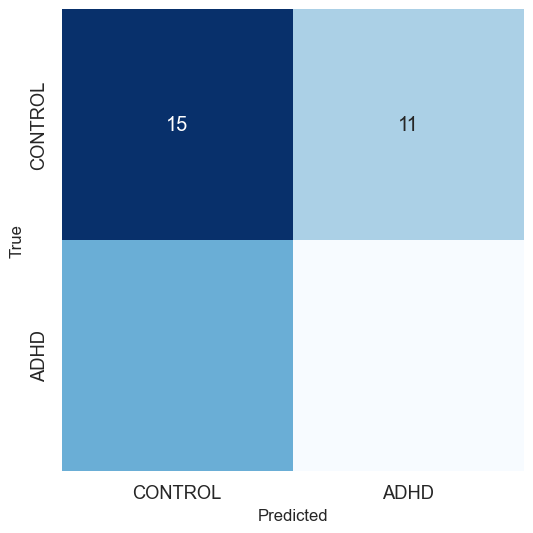

In [119]:
# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a prettier confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    xticklabels=['CONTROL', 'ADHD'],
    yticklabels=['CONTROL', 'ADHD'],
)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("", fontsize=15)
plt.show()

## Atlas Matrix

In [120]:
labels = difumo.labels["difumo_names"]

# Generate a random correlation matrix of size 64x64
difumo_correlation_matrix = np.random.rand(64, 64)

# Fill the diagonal with 1s
np.fill_diagonal(difumo_correlation_matrix, 1)

# Extract the upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = np.triu(difumo_correlation_matrix, k=1)

# Flatten the upper triangle into features
features = upper_triangle[np.triu_indices(64, k=1)]

print('Features shape:', features.shape)
print('Labels shape:', labels.shape)

Features shape: (2016,)
Labels shape: (64,)


In [121]:
# Reshape the features into a correlation matrix
correlation_matrix_reconstructed = np.zeros((64, 64))
correlation_matrix_reconstructed[np.triu_indices(64, k=1)] = features

# Now, we'll create a mapping between each feature and its corresponding brain region pair along with a unique index
feature_mapping = {}
count = 1
for i in range(64):
    for j in range(i+1, 64):
        feature_name = f'{labels[i]} - {labels[j]}'
        feature_mapping[count] = {'name': feature_name, 'index': count}
        count += 1



In [124]:
feature_mapping[1]

{'name': 'Superior frontal sulcus - Fusiform gyrus', 'index': 1}

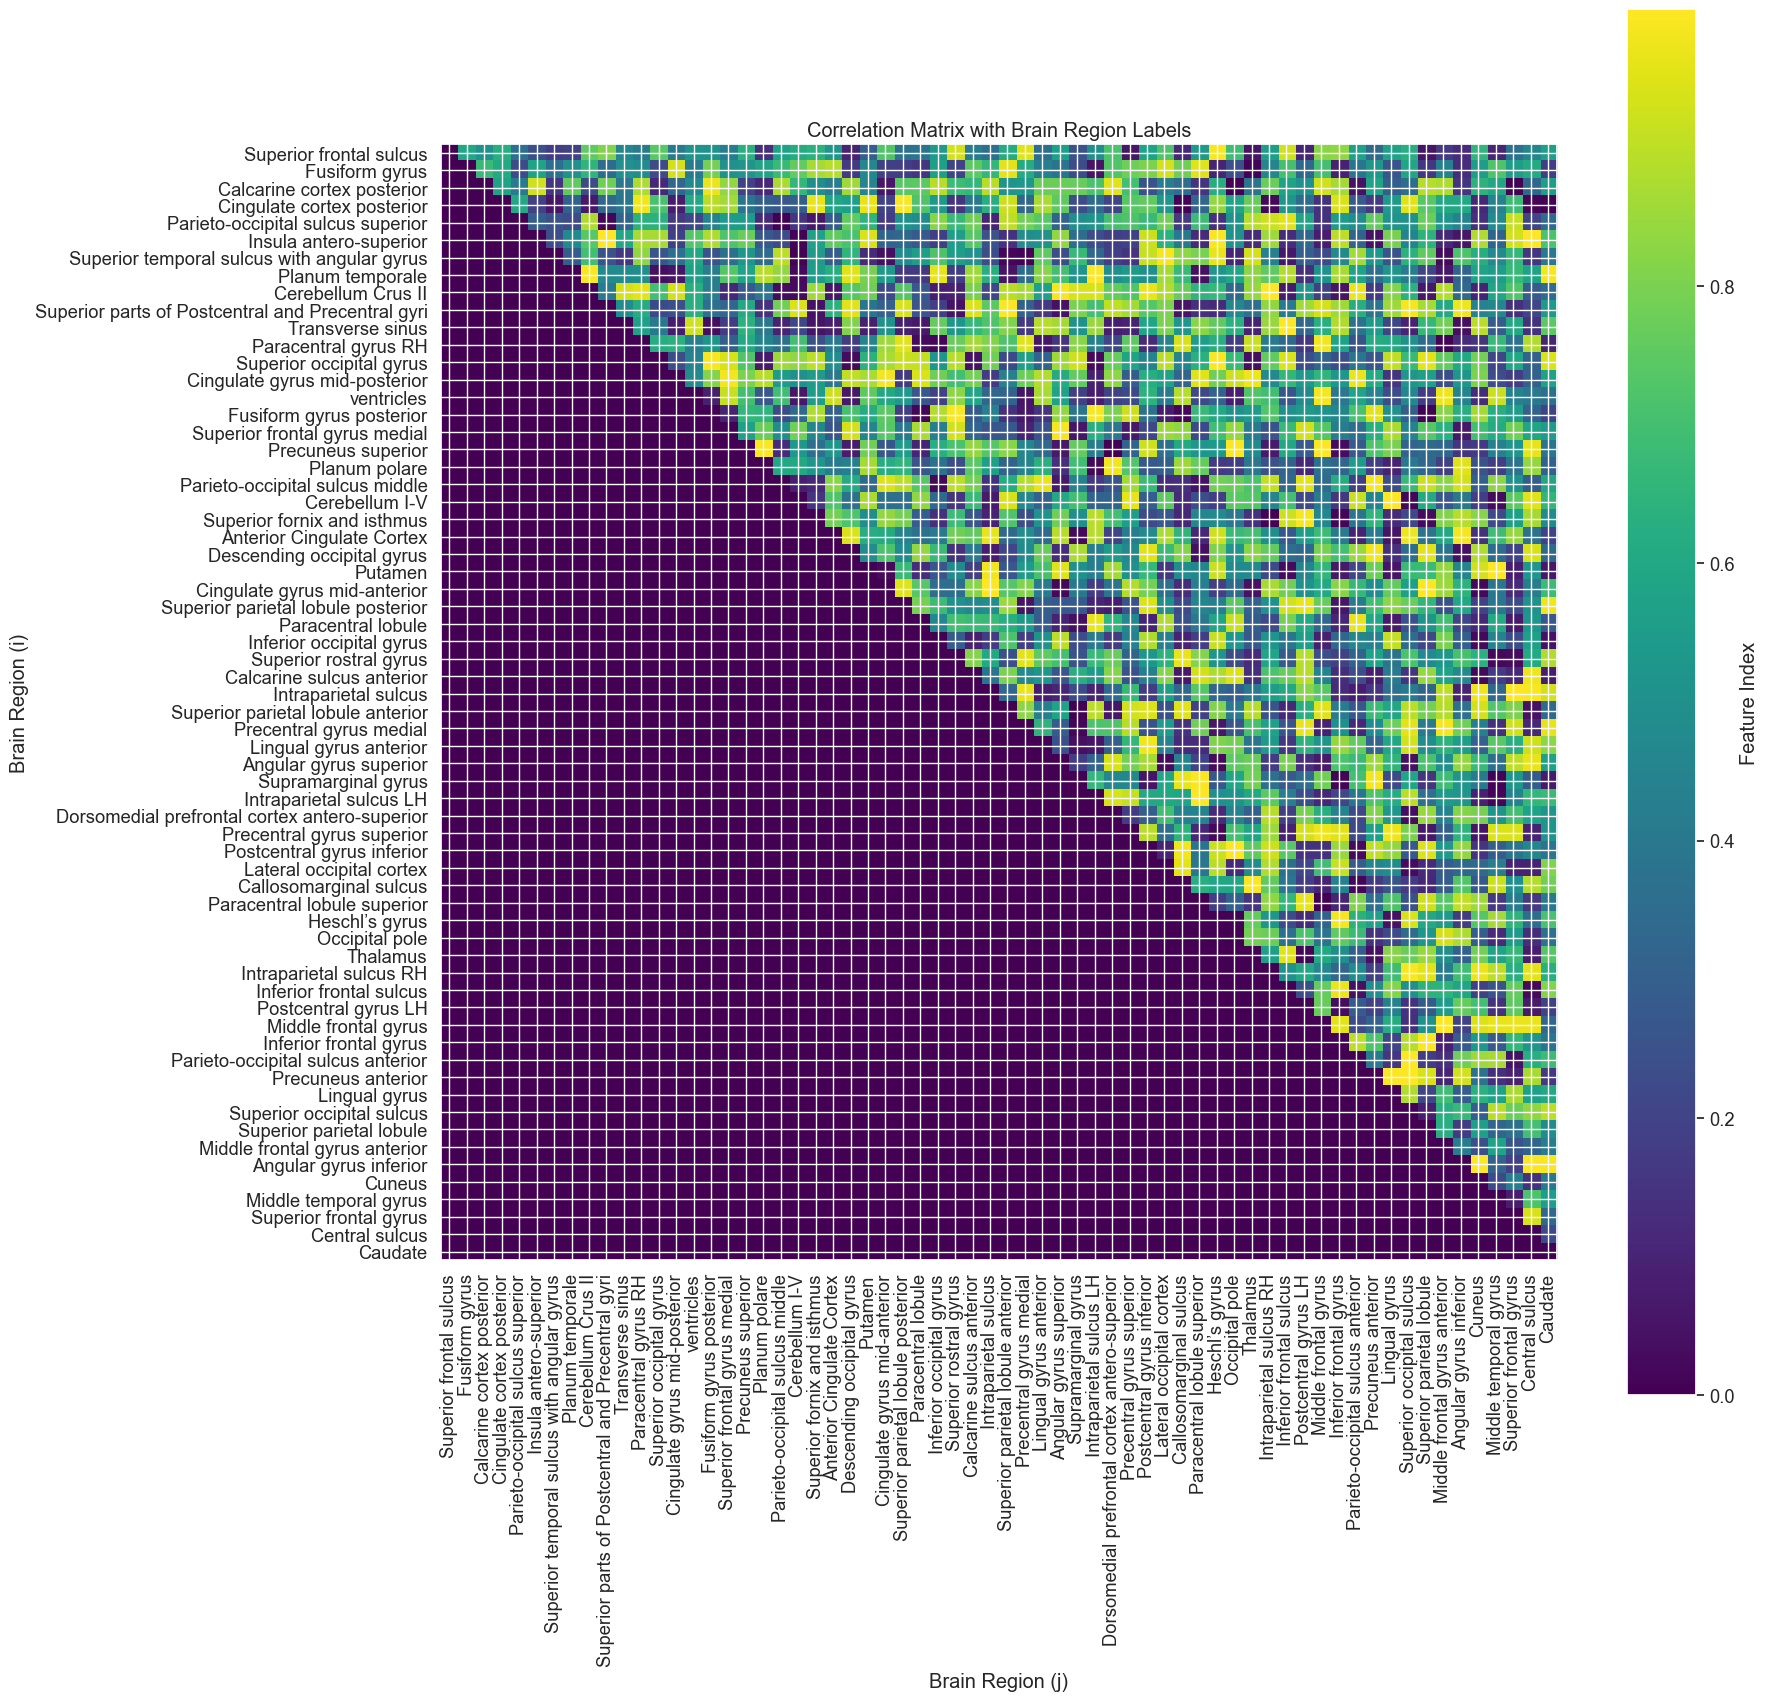

In [129]:
# Define the size of the figure
plt.figure(figsize=(18, 18))

# Plot the correlation matrix
plt.imshow(correlation_matrix_reconstructed, cmap='viridis', origin='upper')

# Add labels to the axes
plt.xticks(range(64), labels, rotation=90)
plt.yticks(range(64), labels)

# Add color bar
plt.colorbar(label='Feature Index')

# Add title and labels
plt.title('Correlation Matrix with Brain Region Labels')
plt.xlabel('Brain Region (j)')
plt.ylabel('Brain Region (i)')

# Display the plot
plt.show()

## Interpreting model feature importance

In [125]:
# Get feature importance for non-linear kernel
# First, obtain the indices of support vectors
support_vector_indices = best_svc_model.support_
# Then, retrieve the support vectors
support_vectors = X_train[support_vector_indices]
# Calculate dual coefficients (Lagrange multipliers)
dual_coefs = best_svc_model.dual_coef_
# Compute feature importance using support vectors and dual coefficients
feature_importance = np.dot(dual_coefs, support_vectors).flatten()

In [126]:
# Sort feature importance scores in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Print the top 10 highest feature importance scores
print("Top 10 Feature Importance Scores:")
for i in range(10):
    print(f"Feature {sorted_indices[i]+1}: {sorted_importance[i]}")

Top 10 Feature Importance Scores:
Feature 363: 1.8389513404627884
Feature 1603: 1.7902518187597891
Feature 1632: 1.75797352564534
Feature 935: 1.6220496325086966
Feature 181: 1.5848860176994135
Feature 1261: 1.4332721798163104
Feature 20: 1.3985492825800696
Feature 1635: 1.353716329632074
Feature 1925: 1.3459605023732775
Feature 1610: 1.341367071295295


In [158]:
# Convert the feature_mapping dictionary to a DataFrame
feature_mapping_df = pd.DataFrame.from_dict(feature_mapping, orient='index')

# Reset the index to make the 'index' column a regular column
feature_mapping_df.reset_index(inplace=True)

# Set column names
feature_mapping_df.columns = ['Feature Index', 'Feature Name', 'Feature Details']

# Print the feature mapping DataFrame

feature_mapping_df[362:364]

Feature Index                                       Feature Name  \
362            363                   Insula antero-superior - Caudate   
363            364  Superior temporal sulcus with angular gyrus - ...   

     Feature Details  
362              363  
363              364

In [131]:
# Create lists to store the data
feature_indices = []
feature_names = []
feature_importances = []

# Populate the lists
for i in range(10):
    feature_index = sorted_indices[i]
    feature_name = feature_mapping_df.loc[feature_index, 'Feature Name']
    feature_indices.append(feature_index + 1)  # Adding 1 to match the original indexing
    feature_names.append(feature_name)
    feature_importances.append(sorted_importance[i])

# Create a DataFrame
top_10_features_df = pd.DataFrame({
    'Feature Index': feature_indices,
    'Feature Name': feature_names,
    'Importance Score': feature_importances
})


top_10_features_df

Feature Index                                       Feature Name  \
0            363                   Insula antero-superior - Caudate   
1           1603  Lingual gyrus anterior - Superior parietal lobule   
2           1632  Angular gyrus superior - Middle frontal gyrus ...   
3            935            Superior frontal gyrus medial - Caudate   
4            181  Calcarine cortex posterior - Angular gyrus inf...   
5           1261                     Putamen - Postcentral gyrus LH   
6             20           Superior frontal sulcus - Cerebellum I-V   
7           1635     Angular gyrus superior - Middle temporal gyrus   
8           1925                     Postcentral gyrus LH - Caudate   
9           1610                   Lingual gyrus anterior - Caudate   

   Importance Score  
0          1.838951  
1          1.790252  
2          1.757974  
3          1.622050  
4          1.584886  
5          1.433272  
6          1.398549  
7          1.353716  
8          1.345961  
9          1.341367

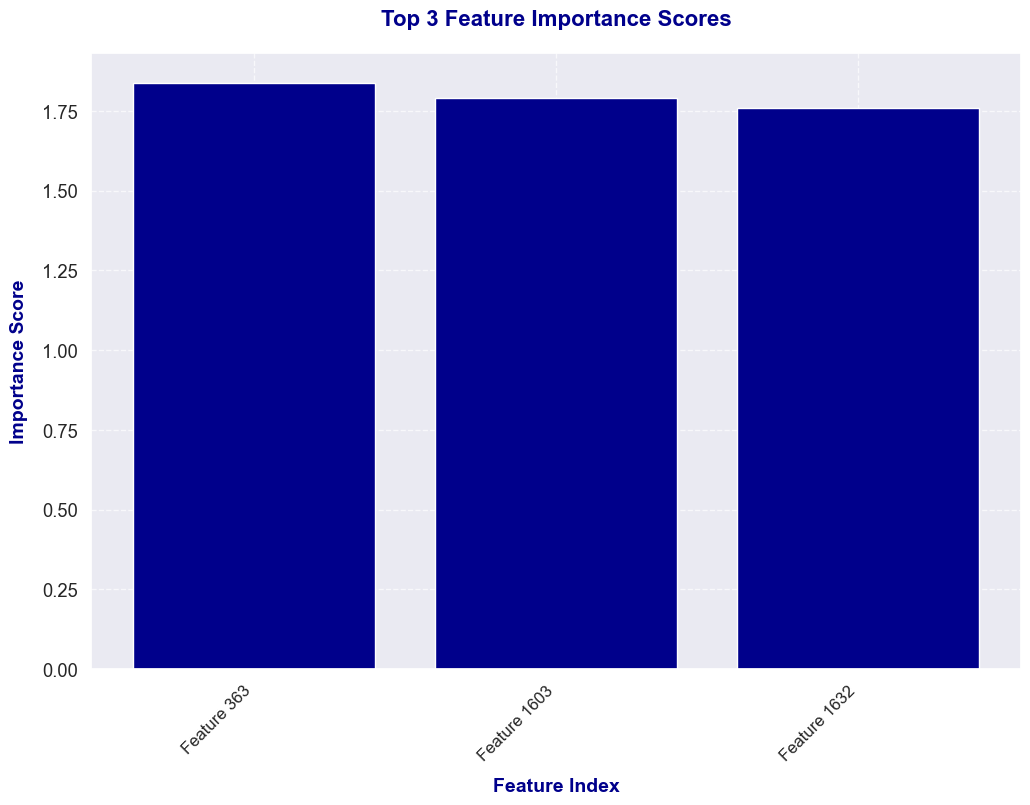

Feature Index                                       Feature Name  \
0            363                   Insula antero-superior - Caudate   
1           1603  Lingual gyrus anterior - Superior parietal lobule   
2           1632  Angular gyrus superior - Middle frontal gyrus ...   

   Importance Score  
0          1.838951  
1          1.790252  
2          1.757974

In [133]:
# Get the top 3 highest feature importance scores and their corresponding indices
top_indices = sorted_indices[:3]
top_importance = sorted_importance[:3]

# Plot the top 3 highest feature importance scores
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_indices)), top_importance, color='darkblue')
plt.title('Top 3 Feature Importance Scores', fontsize=16, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Feature Index', fontsize=14, fontweight='bold', color='darkblue', loc='center', labelpad=10)
plt.ylabel('Importance Score', fontsize=14, fontweight='bold', color='darkblue', loc='center', labelpad=10)
plt.xticks(range(len(top_indices)), [f'Feature {idx+1}' for idx in top_indices], rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

top_10_features_df[:3]